In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 2. Explore the Data

In [42]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [43]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

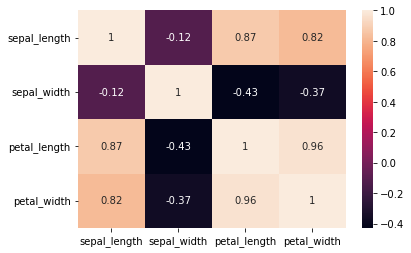

In [45]:
sns.heatmap(iris.corr(),annot=True)

In [46]:
# 3.Prepare the data

x= iris.iloc[:,:-1]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
y = iris.iloc[:,-1]
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [48]:
from sklearn.model_selection import train_test_split


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y,random_state=42)

In [50]:
x_train.shape

(120, 4)

In [51]:
x_train.shape[0]/x.shape[0]

0.8

In [52]:
x.shape

(150, 4)

In [53]:
# Train and Evaluate the classification tree

from sklearn.tree import DecisionTreeClassifier

In [54]:
model = DecisionTreeClassifier(random_state = 1234)

In [55]:
model = model.fit(x_train,y_train)

In [74]:
prediction = model.predict(x_test)

<AxesSubplot:>

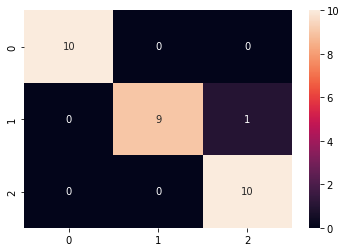

In [75]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)

In [56]:
model.score(x_test,y_test)  #testing score

0.9666666666666667

In [57]:
model.score(x_train,y_train) # training score #overfit

1.0

# 5.visualize the classification tree


In [58]:
from sklearn import tree

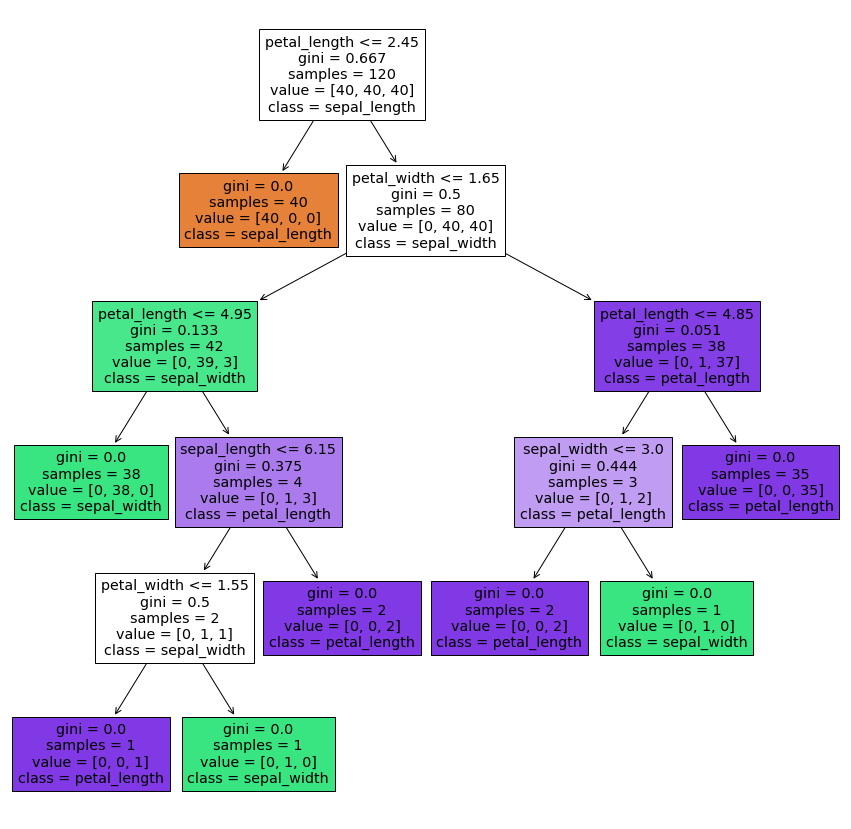

In [59]:
plt.figure(figsize= (15,15))
tree.plot_tree(model,feature_names = list(x.columns),class_names=x.columns,filled = True);

In [60]:
feature_importance = model.feature_importances_

In [61]:
feature_importance

array([0.00625   , 0.01666667, 0.5585683 , 0.41851504])

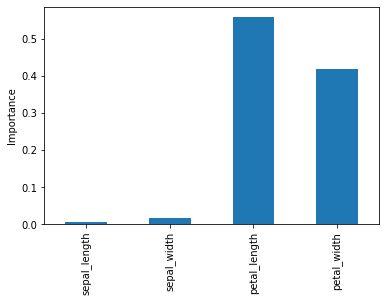

In [63]:
importance = model.feature_importances_
feature_importance = pd.Series(importance,index=x.columns)
feature_importance.plot(kind='bar')
plt.ylabel('Importance');

In [64]:
# prune the classification tree

grid = {'max_depth':[2,3],
       'min_samples_split':[2,3],
       'min_samples_leaf':range(1,6)}

In [65]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state=1234)
gcv = GridSearchCV(estimator = classifier, param_grid = grid)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [2, 3], 'min_samples_leaf': range(1, 6),
                         'min_samples_split': [2, 3]})

In [66]:
model_ =gcv.best_estimator_
model_

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [67]:
model_.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [68]:
model_.score(x_train,y_train)

0.9833333333333333

In [69]:
gcv.score(x_test,y_test)

0.9666666666666667

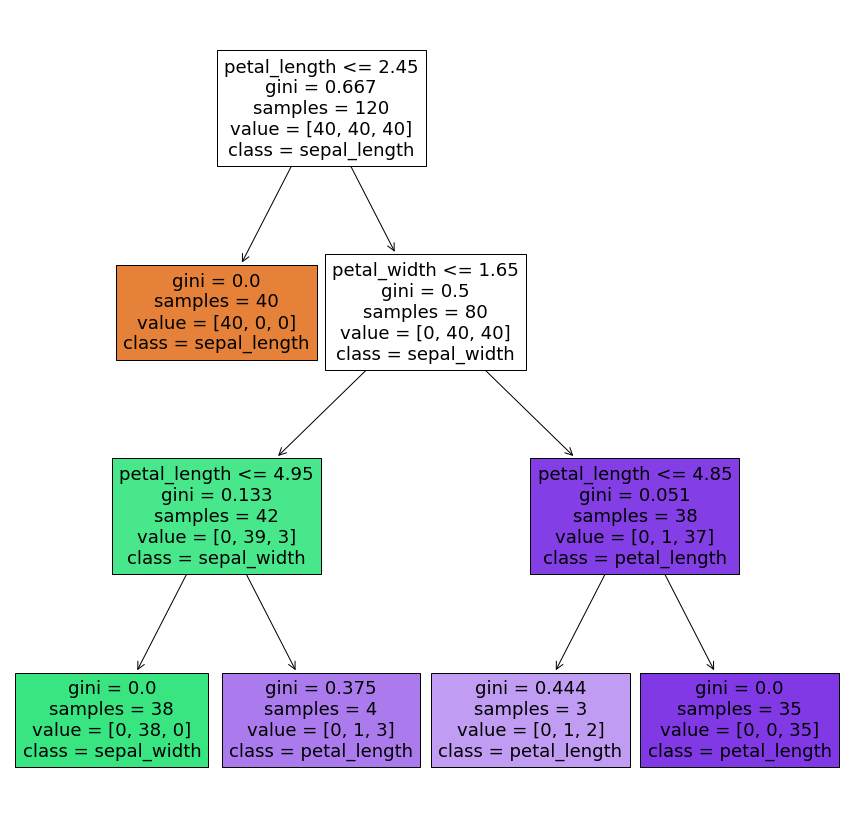

In [70]:
plt.figure(figsize= (15,15))
tree.plot_tree(model_,feature_names = list(x.columns),class_names=x.columns,filled = True);

In [71]:
# model evaluate

y_pre = model_.predict(x_test)
y_pre

array(['setosa', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'virginica', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa'],
      dtype=object)

In [72]:
from sklearn.metrics import confusion_matrix,classification_report

<AxesSubplot:>

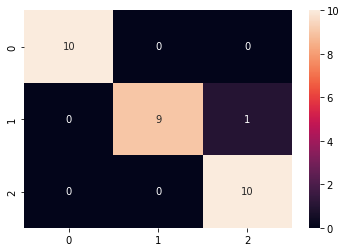

In [73]:
sns.heatmap(confusion_matrix(y_test,y_pre),annot=True)